## Group Assignment 3: Pedestrian Collisions

In order to measure the effectiveness of Vision Zero in Los Angeles and identify potential gaps, it's necessary to get an understanding of which streets/neighborhoods in the county are the most unsafe. 

The cleaned notebook below begins to visualize hot spots in the county. 

In [6]:
#Importing geopanda libraries 

import pandas as pd
import geopandas as gpd

Data Aside: This data was originally raw data from the California Highway Patrol. It included all collision reports from 2022 and was missing many latitude and longitudes. I used the Geocode extension on Google sheets to fill in missing lat/lon. Unfortuantely, since the data does not include complete addresses but primary and secondary roads, I still had to manually go back and add a few, replace some that were really off, and delete intersections I wasn't able to find. We have not been able to find other data of this type that isn't either raw or a high level summary of collisions so will continue trying to improve this data! 

In [7]:
#Importing data

pedes = gpd.read_file('Ped_data3.csv')

In [8]:
# Checking it's the correct data I need to work with

type (pedes)

geopandas.geodataframe.GeoDataFrame

In [9]:
# top 5 
pedes.head ()

,CASE_ID,COLLISION_DATE,CNTY_CITY_LOC,PRIMARY_RD,SECONDARY_RD,MVIW,PED_ACTION,PEDESTRIAN_ACCIDENT,LAT,LONGITUDE,LON,geometry
0,91674033,20220101,1942,I-405 N/B (SAN DIEGO FWY),PLUMMER ST,B,E,Y,34.24084,118.47298,-118.47298,None
1,91692452,20220122,1942,I-110 S/B FROM ROSECRANS AVE.,ROSECRANS AVE.,B,B,Y,33.90177,118.28716,-118.28716,None
2,91699663,20220206,1942,SR-118 W/B (RONALD REAGAN FWY.),TAMPA AVE,B,E,Y,34.27427,118.54716,-118.54716,None
3,91710733,20220213,1942,I-110 N/B (HARBOR FREEWAY),SLAUSON AVENUE,B,E,Y,34.98817,118.28035,-118.28035,None
4,91714444,20220218,1942,MONROE STREET W/B (4200 WEST BLOCK),VERMONT AVE,B,B,Y,34.08568,118.29157,-118.29157,None


In [10]:
pedes.dtypes

CASE_ID                  object
COLLISION_DATE           object
CNTY_CITY_LOC            object
PRIMARY_RD               object
SECONDARY_RD             object
MVIW                     object
PED_ACTION               object
PEDESTRIAN_ACCIDENT      object
LAT                      object
LONGITUDE                object
LON                      object
geometry               geometry
dtype: object

In [11]:
# dataframe info. Latitude and longitude are objects so will have to convert to string later to be able to map. 
pedes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CASE_ID              1119 non-null   object  
 1   COLLISION_DATE       1119 non-null   object  
 2   CNTY_CITY_LOC        1119 non-null   object  
 3   PRIMARY_RD           1119 non-null   object  
 4   SECONDARY_RD         1119 non-null   object  
 5   MVIW                 1119 non-null   object  
 6   PED_ACTION           1119 non-null   object  
 7   PEDESTRIAN_ACCIDENT  1119 non-null   object  
 8   LAT                  1119 non-null   object  
 9   LONGITUDE            1119 non-null   object  
 10  LON                  1119 non-null   object  
 11  geometry             0 non-null      geometry
dtypes: geometry(1), object(11)
memory usage: 105.0+ KB


### Data Exploration

In [12]:
# how many rows and columns?
pedes.shape

(1119, 12)

There were 1118 collisions involving pedestrians in 2022

In [13]:
# what are the columns?
pedes.columns.to_list()

['CASE_ID',
 'COLLISION_DATE',
 'CNTY_CITY_LOC',
 'PRIMARY_RD',
 'SECONDARY_RD',
 'MVIW',
 'PED_ACTION',
 'PEDESTRIAN_ACCIDENT',
 'LAT',
 'LONGITUDE',
 'LON',
 'geometry']

In [14]:
pedes['LAT'].value_counts()

33.9684857    5
34.0215371    5
34.0997829    4
34.0579283    4
34.1866704    3
             ..
34.01993      1
33.99352      1
34.0583275    1
34.1110139    1
              1
Name: LAT, Length: 1009, dtype: int64

### Getting Data Ready

In [15]:
# output the original data's info
pedes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CASE_ID              1119 non-null   object  
 1   COLLISION_DATE       1119 non-null   object  
 2   CNTY_CITY_LOC        1119 non-null   object  
 3   PRIMARY_RD           1119 non-null   object  
 4   SECONDARY_RD         1119 non-null   object  
 5   MVIW                 1119 non-null   object  
 6   PED_ACTION           1119 non-null   object  
 7   PEDESTRIAN_ACCIDENT  1119 non-null   object  
 8   LAT                  1119 non-null   object  
 9   LONGITUDE            1119 non-null   object  
 10  LON                  1119 non-null   object  
 11  geometry             0 non-null      geometry
dtypes: geometry(1), object(11)
memory usage: 105.0+ KB


Converting latitude and longitude to string. 

I also tried the df['DataFrame Column'] = df['DataFrame Column'].astype(int) option but it did not work with this data, it remained an object. 


In [16]:
df = gpd.read_file('Ped_data3.csv')

In [17]:
df['LAT'] = pd.to_numeric(df['LAT'])
df['LON'] = pd.to_numeric(df['LON'])

In [18]:
# huzzah! LAT and LON are now float64
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CASE_ID              1119 non-null   object  
 1   COLLISION_DATE       1119 non-null   object  
 2   CNTY_CITY_LOC        1119 non-null   object  
 3   PRIMARY_RD           1119 non-null   object  
 4   SECONDARY_RD         1119 non-null   object  
 5   MVIW                 1119 non-null   object  
 6   PED_ACTION           1119 non-null   object  
 7   PEDESTRIAN_ACCIDENT  1119 non-null   object  
 8   LAT                  1118 non-null   float64 
 9   LONGITUDE            1119 non-null   object  
 10  LON                  1118 non-null   float64 
 11  geometry             0 non-null      geometry
dtypes: float64(2), geometry(1), object(9)
memory usage: 105.0+ KB


### Mapping

In [19]:
# importing more libraries

import matplotlib.pyplot as plt

import contextily as ctx

In [20]:
df['LAT'] = pd.to_numeric(df['LAT'])
df['LON'] = pd.to_numeric(df['LON'])

In [21]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.LON, df.LAT))

In [22]:
# output the data's projection
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

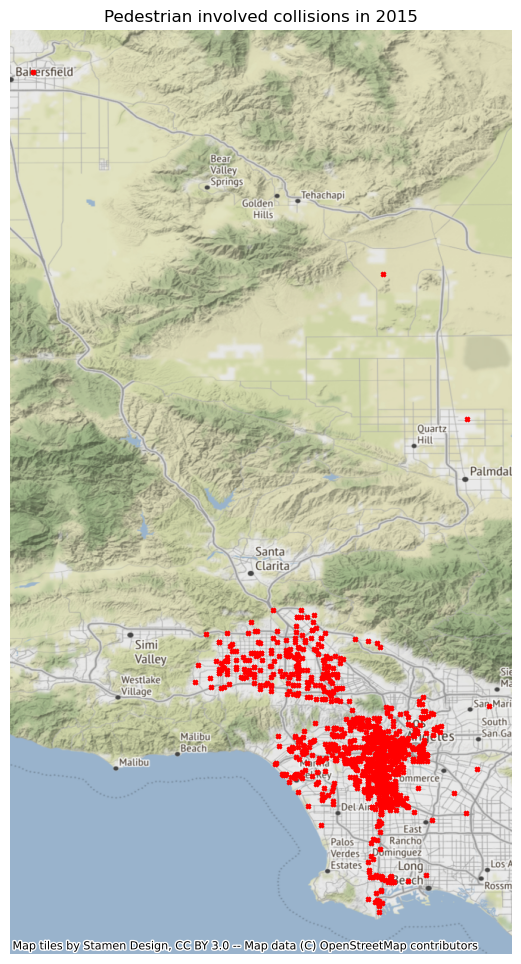

In [46]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
gdf.plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Pedestrian involved collisions in 2015')

# add a basemap
ctx.add_basemap(ax, crs=4326) # note that we must specify the projection here (crs)

The map above maps pedestrian involved collisions in Los Angeles in 2015. There looks to be a bigger higher concentration Downtown but it's a bit difficult to see clearly. It could be helpful to combine data from bike accidents as well and mapping hot spots instead of individual intersections. 

### Narrowing data 

In [25]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

In [26]:
pedes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CASE_ID              1119 non-null   object  
 1   COLLISION_DATE       1119 non-null   object  
 2   CNTY_CITY_LOC        1119 non-null   object  
 3   PRIMARY_RD           1119 non-null   object  
 4   SECONDARY_RD         1119 non-null   object  
 5   MVIW                 1119 non-null   object  
 6   PED_ACTION           1119 non-null   object  
 7   PEDESTRIAN_ACCIDENT  1119 non-null   object  
 8   LAT                  1119 non-null   object  
 9   LONGITUDE            1119 non-null   object  
 10  LON                  1119 non-null   object  
 11  geometry             0 non-null      geometry
dtypes: geometry(1), object(11)
memory usage: 105.0+ KB


In [27]:
pedes_mini = pedes[['PRIMARY_RD','LAT','LON']].copy()

In [28]:
# get info for our subset data
pedes_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRIMARY_RD  1119 non-null   object
 1   LAT         1119 non-null   object
 2   LON         1119 non-null   object
dtypes: object(3)
memory usage: 26.4+ KB


In [29]:
pedes_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PRIMARY_RD  1119 non-null   object
 1   LAT         1119 non-null   object
 2   LON         1119 non-null   object
dtypes: object(3)
memory usage: 26.4+ KB


### Using Folium

In [30]:
# Importing Libraries
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

In [31]:
df1 = pd.read_csv('Ped_data3.csv')

# Keep only relevant columns
df = df1.loc[:, ("CASE_ID","COLLISION_DATE", "LAT", "LON")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CASE_ID         1118 non-null   float64
 1   COLLISION_DATE  1118 non-null   float64
 2   LAT             1118 non-null   float64
 3   LON             1118 non-null   float64
dtypes: float64(4)
memory usage: 35.1 KB


In [32]:
# Create point geometries
geometry = geopandas.points_from_xy(df.LON, df.LAT)
geo_df = geopandas.GeoDataFrame(
    df[["CASE_ID","COLLISION_DATE", "LAT", "LON"]], geometry=geometry
)

geo_df.head()

,CASE_ID,COLLISION_DATE,LAT,LON,geometry
0,91674033.0,20220101.0,34.24084,-118.47298,POINT (-118.47298 34.24084)
1,91692452.0,20220122.0,33.90177,-118.28716,POINT (-118.28716 33.90177)
2,91699663.0,20220206.0,34.27427,-118.54716,POINT (-118.54716 34.27427)
3,91710733.0,20220213.0,34.98817,-118.28035,POINT (-118.28035 34.98817)
4,91714444.0,20220218.0,34.08568,-118.29157,POINT (-118.29157 34.08568)


In [33]:
import geopandas as gpd
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

<AxesSubplot: >

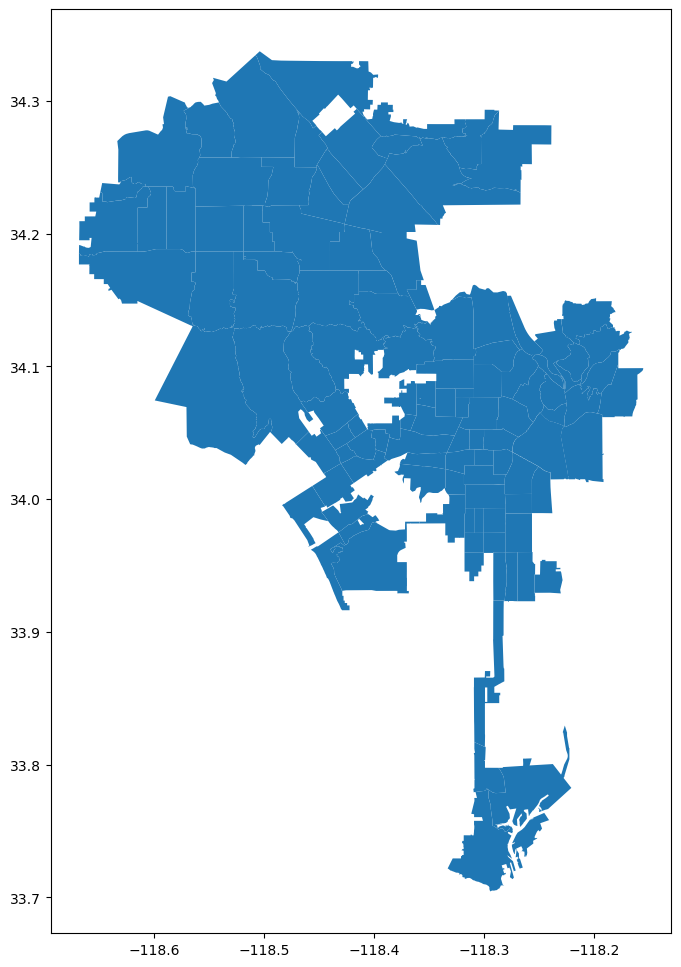

In [34]:
neighborhoods.plot(figsize=(12,12))

<AxesSubplot: >

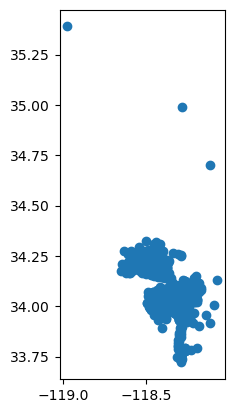

In [35]:
# convert geo_df to geodataframe
gdf = gpd.GeoDataFrame(
   geo_df, geometry=gpd.points_from_xy(geo_df.LON, geo_df.LAT),crs=4326)

# check that it can be mapped
gdf.plot()

In [36]:
# conduct a spatial join (i.e. assign each collition to the neighborhood it is in)
collision_by_n = gpd.sjoin(neighborhoods, gdf) #Spatial join Points to polygons
collision_by_n

,OBJECTID,name,geometry,index_right,CASE_ID,COLLISION_DATE,LAT,LON
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",213,9410361.0,20220128.0,34.033659,-118.294275
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",729,9491504.0,20220817.0,34.034542,-118.294271
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",971,9524190.0,20221102.0,34.030496,-118.291563
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",382,9435597.0,20220310.0,34.032745,-118.295922
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",681,9485737.0,20220720.0,34.032756,-118.294273
...,...,...,...,...,...,...,...,...
112,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1...",910,9520067.0,20221025.0,34.177141,-118.652305
113,114,Lake Balboa,"POLYGON ((-118.50116 34.22114, -118.50116 34.2...",534,9457273.0,20220608.0,34.186633,-118.501119
113,114,Lake Balboa,"POLYGON ((-118.50116 34.22114, -118.50116 34.2...",226,9412779.0,20220125.0,34.193900,-118.498283
113,114,Lake Balboa,"POLYGON ((-118.50116 34.22114, -118.50116 34.2...",478,9449253.0,20220523.0,34.208428,-118.504436


In [37]:
collision_counts = collision_by_n.value_counts('name').reset_index(name='collision_count')

In [38]:
collision_counts

,name,collision_count
0,Downtown,79
1,Westlake,51
2,Florence,40
3,Hollywood,35
4,Green Meadows,31
...,...,...
100,Bel-Air,1
101,Sunland,1
102,Hollywood Hills West,1
103,Windsor Square,1


In [39]:
# add the count to the neighborhoods
neighborhoods = neighborhoods.merge(collision_counts, how='left', on='name')

In [40]:
neighborhoods.sample(10)

,OBJECTID,name,geometry,collision_count
101,102,Vermont Vista,"POLYGON ((-118.28044 33.92912, -118.28066 33.9...",12.0
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",7.0
53,54,Lake View Terrace,"POLYGON ((-118.38741 34.29824, -118.38740 34.2...",NaN
13,14,Carthay,"POLYGON ((-118.36665 34.05169, -118.36665 34.0...",1.0
45,46,Highland Park,"POLYGON ((-118.18914 34.13184, -118.18744 34.1...",10.0
65,66,North Hills,"POLYGON ((-118.49525 34.22023, -118.49569 34.2...",9.0
77,78,Rancho Park,"POLYGON ((-118.41484 34.03232, -118.41235 34.0...",1.0
90,91,Tarzana,"POLYGON ((-118.52729 34.17083, -118.52724 34.1...",2.0
40,41,Hansen Dam,"POLYGON ((-118.36203 34.27323, -118.36106 34.2...",NaN
37,38,Green Meadows,"POLYGON ((-118.25411 33.95104, -118.25411 33.9...",31.0


In [41]:
neighborhoods.head()

,OBJECTID,name,geometry,collision_count
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",7.0
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",2.0
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0...",5.0
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",2.0
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0...",19.0


<AxesSubplot: title={'center': 'Concentration of pedestrian involved collisions in 2015'}>

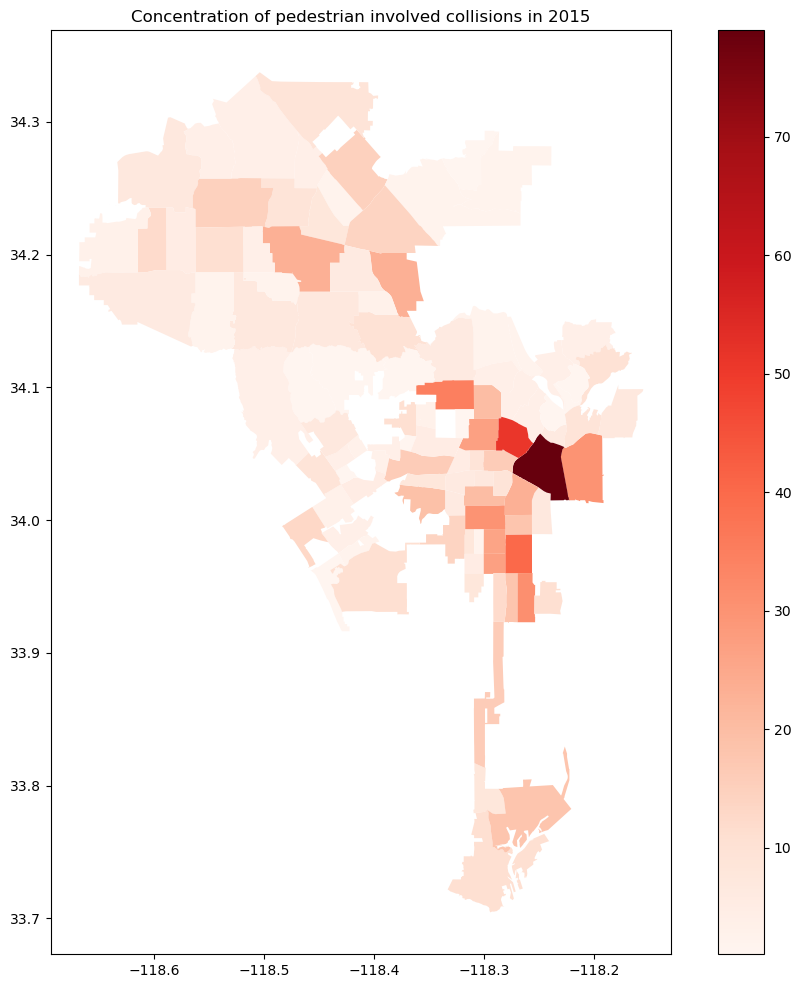

In [49]:
# choropleth map of collisions by neighborhoods
fig,ax = plt.subplots(figsize=(12,12))

ax.set_title('Concentration of pedestrian involved collisions in 2015')

neighborhoods.plot(ax=ax,column='collision_count',legend=True,cmap='Reds')

The map above is more helpful than the first to visualize concentrations of pedestrian collions (in 2015) in neighborhoods of LA. 